In [96]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
# On utilise le dataset Mnist

mnist = fetch_openml('mnist_784', version=1,as_frame= False)

In [71]:
print(mnist.data.shape)

(70000, 784)


In [72]:
print(mnist.target.shape)

(70000,)


In [98]:
sample = np.random.randint(70000, size=5000)
data = mnist.data[sample]
target = mnist.target[sample]

In [99]:
xtrain,xtest,ytrain,ytest = train_test_split(data,target,train_size=0.8)

In [100]:
knn = neighbors.KNeighborsClassifier(n_neighbors= 3)

In [101]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [102]:
#Erreur pour k = 3
error = 1 - knn.score(xtest,ytest)
print("Erreur : %F" %error)

Erreur : 0.067000


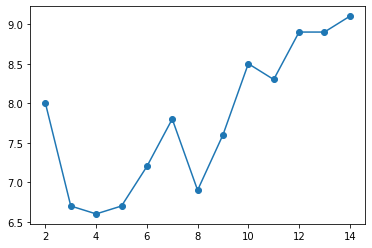

In [103]:
#Pourcentage d'erreur pour K allant de 2 a 14
errors = []

for k in range(2,15):
    knn= neighbors.KNeighborsClassifier(n_neighbors=k)
    errors.append(100 *(1 - knn.fit(xtrain,ytrain).score(xtest,ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show() 

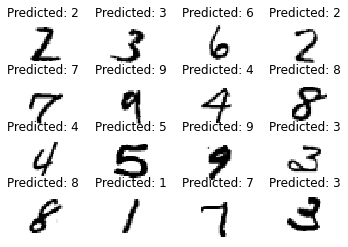

In [140]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(4)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

# On redimensionne les données sous forme d'images
images = xtest.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=16)

# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(4,4)

for index, value in enumerate(select):
    plt.subplot(4,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()